In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/cust chun.csv")

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.drop("customerID",axis=1,inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# total charge is an object .we have to change that to codes

In [10]:
pd.to_numeric(df.TotalCharges,errors="coerce")# errors="coerce" will remove all the errors of spaces and put na there

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [11]:
pd.to_numeric(df.TotalCharges,errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [12]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df1=df[df.TotalCharges!=" "]

In [31]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [15]:
df1.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

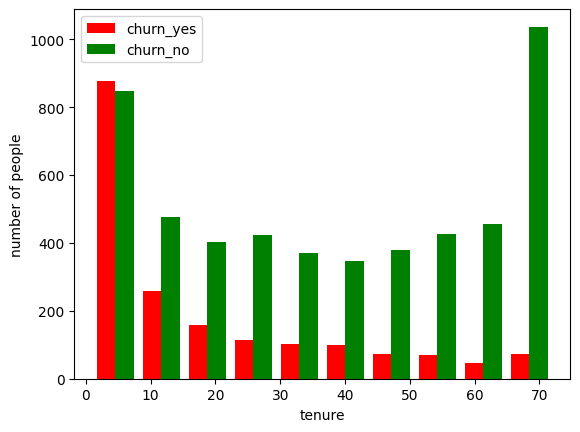

In [17]:
churn_yes=df1[df1["Churn"]=="Yes"].tenure
churn_no=df1[df1["Churn"]=="No"].tenure
plt.hist([churn_yes,churn_no],color=["red","green"],label=["churn_yes","churn_no"])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("number of people")
plt.show()


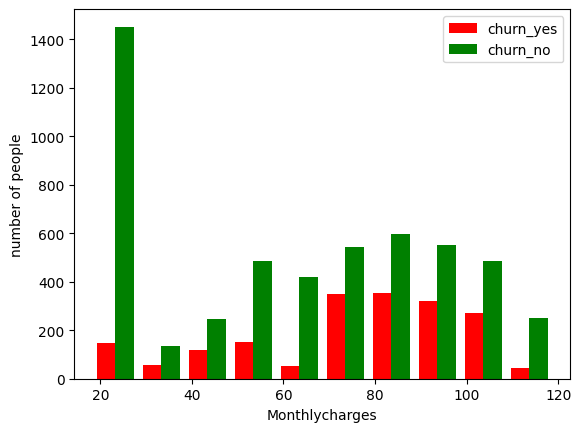

In [18]:
churn_yes=df1[df1["Churn"]=="Yes"].MonthlyCharges
churn_no=df1[df1["Churn"]=="No"].MonthlyCharges
plt.hist([churn_yes,churn_no],color=["red","green"],label=["churn_yes","churn_no"])
plt.legend()
plt.xlabel("Monthlycharges")
plt.ylabel("number of people")
plt.show()


In [19]:

for column in df1:
  if df1[column].dtypes=="object":
    print(column,df1[column].unique())


gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [32]:
df1.replace("No phone service","No",inplace=True)
df1.replace("No internet service","No",inplace=True)



In [21]:
for column in df1:
  if df1[column].dtypes=="object":
    print(column,df1[column].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [33]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
df1["gender"]=LB.fit_transform(df1["gender"])
df1["Partner"]=LB.fit_transform(df1["Partner"])



In [23]:
yes_no_col=["Dependents","PhoneService",	"MultipleLines","OnlineSecurity",	"OnlineBackup",	"DeviceProtection",	"TechSupport",	"StreamingTV",	"StreamingMovies","PaperlessBilling","Churn"]

In [34]:
for i in yes_no_col:
  df1[i].replace({"Yes":1,"No":0},inplace=True)

In [25]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [35]:
df1["InternetService"]=LB.fit_transform(df1["InternetService"])

In [27]:
df1["InternetService"].unique()

array([0, 1, 2])

In [36]:
df1["InternetService"]=LB.fit_transform(df1["InternetService"])

In [37]:
df1["Contract"]=LB.fit_transform(df1["Contract"])

In [38]:
df1["PaymentMethod"]=LB.fit_transform(df1["PaymentMethod"])

In [40]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df1[["tenure","MonthlyCharges","TotalCharges"]]=min_max.fit_transform(df1[["tenure","MonthlyCharges","TotalCharges"]])

In [41]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,0,0,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,0,0,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,0,1,0,1,1,1,1,1,1,3,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,1,1,0,1,1,0,1,1,1,1,1,0.845274,0.847461,0
7040,0,0,1,1,0.140845,0,0,0,1,0,0,0,0,0,0,1,2,0.112935,0.037809,0
7041,1,1,1,0,0.042254,1,1,1,0,0,0,0,0,0,0,1,3,0.558706,0.033210,1


In [42]:
X=df1.drop("Churn",axis=1)

In [43]:
y=df1["Churn"]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,shuffle=True,)

In [47]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1980,1,0,0,0,0.126761,1,1,1,0,1,1,0,0,1,0,1,2,0.766169,0.115711
5485,1,0,0,0,0.000000,1,0,0,1,0,0,0,0,0,0,1,3,0.323383,0.003687
198,1,0,1,1,1.000000,1,1,1,0,1,1,1,1,1,2,1,0,0.935323,0.925785
6326,0,0,0,0,0.859155,0,0,0,0,1,1,0,0,1,2,1,1,0.252239,0.315013
1304,1,1,1,0,0.197183,1,1,1,0,0,0,0,0,1,0,1,0,0.670149,0.153098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,1,0,0,0,0.084507,1,1,1,0,0,0,0,1,1,0,0,2,0.775622,0.071648
4067,0,0,1,0,0.943662,1,0,0,1,1,0,1,1,1,2,1,0,0.610448,0.634318
1351,1,0,1,1,0.140845,1,0,2,0,0,0,0,0,0,0,1,2,0.021891,0.026771
3460,0,0,1,0,0.661972,1,0,1,0,0,1,1,1,1,0,1,1,0.813930,0.555643


In [49]:
X_train.shape

(5274, 19)

In [48]:
import tensorflow as tf
from tensorflow import keras

In [65]:

model = keras.Sequential([
   keras.layers.Dense(units=20, input_shape=(19,), activation="relu"),
    keras.layers.Dense(units=15, activation="relu"),
    keras.layers.Dense(units=20, activation="relu"),
    keras.layers.Dropout(0.3),  # Adding dropout for regularization
    keras.layers.Dense(units=1, activation="sigmoid")
])



model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train,y_train,epochs=200)

Epoch 1/200
165/165 [==============================] - 2s 4ms/step - loss: 0.5403 - accuracy: 0.7217
Epoch 2/200
165/165 [==============================] - 1s 4ms/step - loss: 0.4578 - accuracy: 0.7679
Epoch 3/200
165/165 [==============================] - 1s 4ms/step - loss: 0.4480 - accuracy: 0.7867
Epoch 4/200
165/165 [==============================] - 1s 4ms/step - loss: 0.4389 - accuracy: 0.7856
Epoch 5/200
165/165 [==============================] - 1s 4ms/step - loss: 0.4353 - accuracy: 0.7948
Epoch 6/200
165/165 [==============================] - 1s 4ms/step - loss: 0.4377 - accuracy: 0.7977
Epoch 7/200
165/165 [==============================] - 1s 4ms/step - loss: 0.4295 - accuracy: 0.7998
Epoch 8/200
165/165 [==============================] - 1s 4ms/step - loss: 0.4307 - accuracy: 0.7952
Epoch 9/200
165/165 [==============================] - 1s 3ms/step - loss: 0.4266 - accuracy: 0.7983
Epoch 10/200
165/165 [==============================] - 1s 3ms/step - loss: 0.4245 - accura

In [66]:
model.evaluate(X_test,y_test)

55/55 [==============================] - 0s 3ms/step - loss: 0.5287 - accuracy: 0.7719


[0.5286672711372375, 0.7718998789787292]

In [67]:
yp=model.predict(X_test)

55/55 [==============================] - 0s 2ms/step


In [68]:
yp

array([[0.00873793],
       [0.20513909],
       [0.20016459],
       ...,
       [0.2814163 ],
       [0.9259299 ],
       [0.89850426]], dtype=float32)

In [72]:
y_pred=[]
for i in yp:
  if i>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [75]:
y_pred[10]

0

In [76]:
y_test[10]

0

In [77]:
from sklearn.metrics import confusion_matrix,classification_report

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1234
           1       0.69      0.43      0.53       524

    accuracy                           0.77      1758
   macro avg       0.74      0.67      0.69      1758
weighted avg       0.76      0.77      0.75      1758



In [79]:
import seaborn as sn

Text(50.722222222222214, 0.5, 'true')

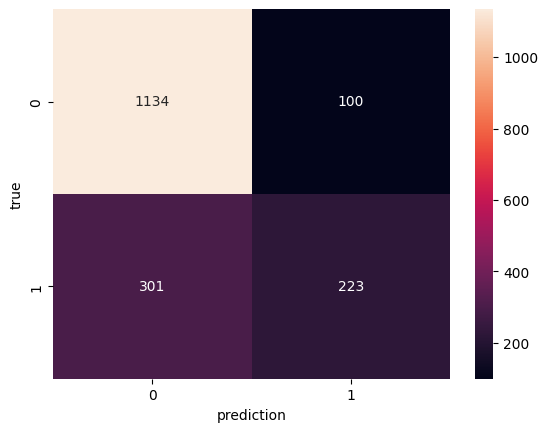

In [83]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred,)
sn.heatmap(cm,annot=True,fmt="d",)
plt.xlabel("prediction")
plt.ylabel("true")
